# roboflow 데이터셋 활용하여 안전모 Object Detection

## Yolo 사용하기 위한 사전지식

### 1. YOLO에 사용될 데이터
![Yolo1](https://github.com/gzone2000/TEMP_TEST/raw/master/Yolo%20%EC%82%AC%EC%9A%A9%ED%95%A0%20%ED%8C%8C%EC%9D%BC%EB%93%A4.png)

### 2. Yolo Conifg 파일
![YoloConfig](https://github.com/gzone2000/TEMP_TEST/raw/master/Yolo%20%EC%82%AC%EC%9A%A9%ED%95%A0%20config%ED%8C%8C%EC%9D%BC.png)

### 3. Bounding Box 포맷 형식
![BBOX](https://github.com/gzone2000/TEMP_TEST/raw/master/BBOX%20%ED%8F%AC%EB%A7%B7.png)

# 1. roboflow를 통한 데이터셋 받아오기

### roboflow dataset 받아오기
- 구글 검색 : roboflow dataset  
- roboflow datasets : https://public.roboflow.com/  
- 안전모 선택 : Hard Hat Workers Dataset 
- Downloads > Raws > 이미지 다운로드 클릭
- Export : Format > Yolov5 Pytorch , Show download code 체크
- Jupyter 탭 클릭 > jupyter notebook용 소스코드 복사

### 추가로 COCO Json 형태로 데이터 받아 annotation.coco.json 파일 열어 , Class 뭐가 있는지 확인 필요

        {
            "id": 1,
            "name": "head",
            "supercategory": "Workers"
        },
        {
            "id": 2,
            "name": "helmet",
            "supercategory": "Workers"
        },
        {
            "id": 3,
            "name": "person",
            "supercategory": "Workers"
        }


In [ ]:
!curl -L "https://public.roboflow.com/ds/FwA9tEvkKf?key=4DLhWgxP5k" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: train/labels/000560_jpg.rf.0c7bf997f0ccb3aa4666aae7bacd15e1.txt  
 extracting: train/labels/002296_jpg.rf.0c9e2f0756e58251ba576c4799a52013.txt  
 extracting: train/labels/000135_jpg.rf.0ca2fda801cbc26acad48a4970d5fd9c.txt  
 extracting: train/labels/000927_jpg.rf.0c8662a3294885b1dce0b9c9f71bf63d.txt  
 extracting: train/labels/003070_jpg.rf.0d4f1aa374695130ec80a94eb7d3029f.txt  
 extracting: train/labels/004879_jpg.rf.0d5c27700ff04fb911be2cc0b0ae7e44.txt  
 extracting: train/labels/000307_jpg.rf.0da33908e280d7c9d61d7cb6470ecd3f.txt  
 extracting: train/labels/005099_jpg.rf.0de8be5e21e09352a246b6c1faf53ecc.txt  
 extracting: train/labels/004482_jpg.rf.0d541b29bd4b4ededc19b5cafebb4fe9.txt  
 extracting: train/labels/000735_jpg.rf.0d5b96188e544511c13ac1e1bfff0b87.txt  
 extracting: train/labels/001653_jpg.rf.0cc3a72fd244aa7aadee6c4d766190df.txt  
 extracting: train/labels/002922_jpg.rf.0d24f020d6f688f966ef38c7a0eeba3e.txt  
 extracting: tra

In [ ]:
# Train 이미지
!ls -l /content/train/images | head

total 186084
-rw-r--r-- 1 root root  49098 Jun 22  2020 000001_jpg.rf.fddb09e33a544e332617f8ceb53ee805.jpg
-rw-r--r-- 1 root root  33759 Jun 22  2020 000002_jpg.rf.85b55e30b8ce745e3c16966991a38018.jpg
-rw-r--r-- 1 root root  27366 Jun 22  2020 000003_jpg.rf.9fc4dfe06775f585757ede9300ba6af9.jpg
-rw-r--r-- 1 root root  27060 Jun 22  2020 000004_jpg.rf.6e499d6a5b40d901d318a92e672842ce.jpg
-rw-r--r-- 1 root root  24213 Jun 22  2020 000005_jpg.rf.2459a55dca0ff3afbe13f8d219a9a818.jpg
-rw-r--r-- 1 root root  17359 Jun 22  2020 000006_jpg.rf.6abcef9263250fa3bae58b72e8987b2b.jpg
-rw-r--r-- 1 root root  32049 Jun 22  2020 000007_jpg.rf.8e98fb789dfc011fb526ce49daf8da31.jpg
-rw-r--r-- 1 root root  85235 Jun 22  2020 000008_jpg.rf.e02009e902c74a6a08eee7ac6ef77bcb.jpg
-rw-r--r-- 1 root root  24029 Jun 22  2020 000009_jpg.rf.2b9c37488ee6a4dcc1193aaac99b9f55.jpg


In [ ]:
# Train Label 
!ls -l /content/train/labels | head

total 21076
-rw-r--r-- 1 root root   78 Jun 22  2020 000001_jpg.rf.fddb09e33a544e332617f8ceb53ee805.txt
-rw-r--r-- 1 root root  105 Jun 22  2020 000002_jpg.rf.85b55e30b8ce745e3c16966991a38018.txt
-rw-r--r-- 1 root root  208 Jun 22  2020 000003_jpg.rf.9fc4dfe06775f585757ede9300ba6af9.txt
-rw-r--r-- 1 root root  479 Jun 22  2020 000004_jpg.rf.6e499d6a5b40d901d318a92e672842ce.txt
-rw-r--r-- 1 root root  109 Jun 22  2020 000005_jpg.rf.2459a55dca0ff3afbe13f8d219a9a818.txt
-rw-r--r-- 1 root root  383 Jun 22  2020 000006_jpg.rf.6abcef9263250fa3bae58b72e8987b2b.txt
-rw-r--r-- 1 root root  526 Jun 22  2020 000007_jpg.rf.8e98fb789dfc011fb526ce49daf8da31.txt
-rw-r--r-- 1 root root  369 Jun 22  2020 000008_jpg.rf.e02009e902c74a6a08eee7ac6ef77bcb.txt
-rw-r--r-- 1 root root   53 Jun 22  2020 000009_jpg.rf.2b9c37488ee6a4dcc1193aaac99b9f55.txt


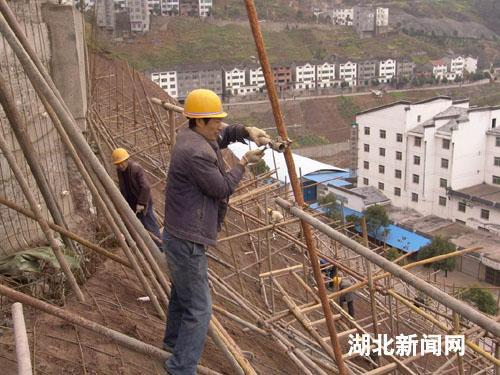

In [ ]:
from IPython.display import Image

Image('/content/train/images/000001_jpg.rf.fddb09e33a544e332617f8ceb53ee805.jpg')

In [ ]:
# class 번호, BBOX 정규화 확인
!cat /content/train/labels/000001_jpg.rf.fddb09e33a544e332617f8ceb53ee805.txt

1 0.408 0.30266666666666664 0.104 0.15733333333333333
1 0.245 0.424 0.046 0.08

# 2. YOLOv5 받아오기 및 설치



In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 11142, done.
remote: Total 11142 (delta 0), reused 0 (delta 0), pack-reused 11142
Receiving objects: 100% (11142/11142), 11.14 MiB | 24.68 MiB/s, done.
Resolving deltas: 100% (7699/7699), done.


In [ ]:
%cd yolov5
!pip install -r requirements.txt

/content/yolov5
     |████████████████████████████████| 596 kB 5.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# 3. AI가 학습할수 있도록 학습 Data와 검증 Data 확인

In [ ]:
!pwd

/content/yolov5


In [ ]:
Train_Image_Path = '/content/train/images'
Test_Image_Path = '/content/test/images'

Train_Iabel_Path = '/content/train/labels'
Test_Iabel_Path = '/content/test/labels'

In [ ]:
from glob import glob 

train_image_list = glob(Train_Image_Path + '/*.jpg')
print('학습 이미지 개수 = ' + str(len(train_image_list)))

test_image_list = glob(Test_Image_Path +'/*.jpg')
print('검증 이미지 개수 = ' + str(len(test_image_list)))

학습 이미지 개수 = 5269
검증 이미지 개수 = 1766


In [ ]:
train_image_list[0]

'/content/train/images/004889_jpg.rf.c903b0423f4fa76e6c44d065c593ce31.jpg'

# 4. Yaml 파일 수정

In [ ]:
# Train / Val Label 리스트 정보를 파일로 만든다.

with open('train.txt', 'w') as f:
	f.write('\n'.join(train_image_list) + '\n')
with open('val.txt', 'w') as f:
	f.write('\n'.join(test_image_list) + '\n')

In [ ]:
!ls -l train.txt val.txt

-rw-r--r-- 1 root root 384637 Mar  2 00:21 train.txt
-rw-r--r-- 1 root root 127152 Mar  2 00:21 val.txt


In [ ]:
!cat train.txt | head

/content/train/images/004889_jpg.rf.c903b0423f4fa76e6c44d065c593ce31.jpg
/content/train/images/004400_jpg.rf.b7f93839af70668413ed131f8b93d166.jpg
/content/train/images/000723_jpg.rf.454623f9fc9f1f41896a19814acefedb.jpg
/content/train/images/000850_jpg.rf.4707c5e9145b35918523814d10c012cb.jpg
/content/train/images/000869_jpg.rf.54141c5e007189689c0d740016713d2a.jpg
/content/train/images/000984_jpg.rf.ddf908afe147c6d646208a46e6e832dd.jpg
/content/train/images/003460_jpg.rf.c8dd713659320802074505070908a8d7.jpg
/content/train/images/005124_jpg.rf.4c87d5ae122e5da15f5a71d2a6e65177.jpg
/content/train/images/001542_jpg.rf.604227eece8bdd56aa000b81563b56d1.jpg
/content/train/images/003390_jpg.rf.806682a0163fa5676fe133027b332e8b.jpg


In [ ]:
# 딕셔너리 생성 및 YAML 형식으로 저장
data = {}

data['train'] = '/content/yolov5/train.txt'
data['val'] = '/content/yolov5/val.txt'
data['nc'] = 3
data['names'] = ['head', 'helmet', 'person']

In [ ]:
data

{'names': ['head', 'helmet', 'person'],
 'nc': 3,
 'train': '/content/yolov5/train.txt',
 'val': '/content/yolov5/val.txt'}

In [ ]:
# YAML 파일로 저장
import yaml

with open('data.yaml', 'w') as f:
	yaml.dump(data, f)

print(data)

{'train': '/content/yolov5/train.txt', 'val': '/content/yolov5/val.txt', 'nc': 3, 'names': ['head', 'helmet', 'person']}


# 5. YOLOv5 를 이용한 학습
- https://github.com/ultralytics/yolov5 > Tutorials > Train Custom Data 

In [ ]:
!pwd

/content/yolov5


In [ ]:
## Train YOLOv5s on COCO128 for 3 epochs
## --img 640 --> --img 416 변경
## --weights yolov5s.pt : pretrained 모델

!python train.py --img 416 --batch 16 --epochs 5 --data /content/yolov5/data.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0

#### 위 Yolo 학습 결과 출력 내용에서 보아야 될 포인트
- mAP@.5 의미 > Mean Average Precision + IOU 0.5
- mAP0.5:.95 의미 >  Mean Average Precision + IOU 0.5 ~ 0.95
- mAP 값들이 높을수록 좋다.

In [ ]:
# 모델 가중치 저장 위치
!ls -l runs/train/exp4/weights/best.pt

-rw-r--r-- 1 root root 14306421 Mar  2 01:06 runs/train/exp4/weights/best.pt


# 6. YOLOv5 이용한 Object Detection

In [ ]:
!pwd

/content/yolov5


In [ ]:
# 1개 이미지에 대해 Object Detection 수행
val_image_path = test_image_list[0]

# 이미지 사이즈 : 416 , Confidence : 0.5 , Weight : 학습된 가중치
!python detect.py --source '{val_image_path}' --img 416 --conf 0.5 --weights runs/train/exp4/weights/best.pt

detect: weights=['runs/train/exp4/weights/best.pt'], source=/content/test/images/006024_jpg.rf.31f7188f7308a99e99164f4619a4fa65.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test/images/006024_jpg.rf.31f7188f7308a99e99164f4619a4fa65.jpg: 320x416 1 helmet, Done. (0.026s)
Speed: 0.3ms pre-process, 25.6ms inference, 2.1ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp


In [ ]:
# Object Detection 수행 결과 저장
!ls -l runs/detect/exp

total 60
-rw-r--r-- 1 root root 60185 Mar  2 01:10 006024_jpg.rf.31f7188f7308a99e99164f4619a4fa65.jpg


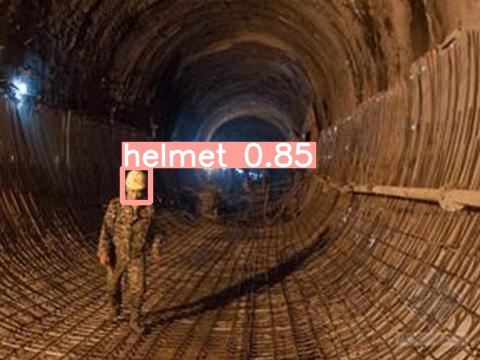

In [ ]:
Image('runs/detect/exp/006024_jpg.rf.31f7188f7308a99e99164f4619a4fa65.jpg')